In [1]:
from models.merge import CNN, BiLSTM, ELMo, Ensemble
from data.Dataset import Dataset
from data.TrainSet import TrainSet
from utils.utils import plot_words_cloud, plot_words_count, plot_compare_bars

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chrysalis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Read books

In [2]:
names = ["Furman", "Garshin"]
dataset = Dataset(names)
dataset.data

,label,author,text
0,0,Furman,﻿П. Р. Фурман\nСаардамский плотник\n \n\n184...
1,1,Garshin,﻿Всеволод Михайлович Гаршин\nНадежда Николаев...


Clean text from punctuation

In [3]:
dataset.preprocess()
dataset.data

Preprocessing Garshin: 100%|██████████| 16832/16832 [00:02<00:00, 6961.52it/s]


,label,author,text
0,0,Furman,фурман саардамский плотник глава незнакомец на...
1,1,Garshin,всеволод михайлович гаршин надежда николаевна ...


VISUALIZING THE DATA

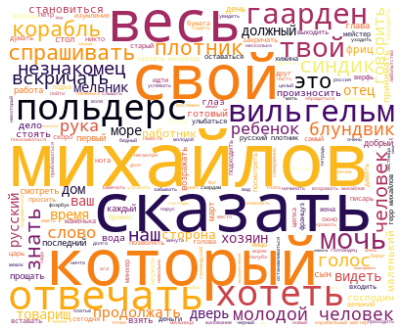

<Figure size 432x288 with 0 Axes>

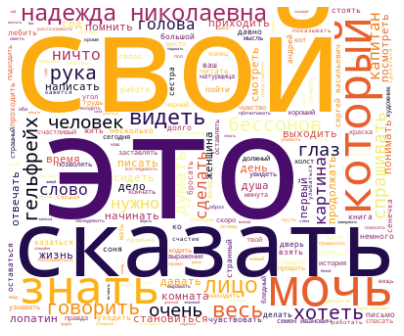

<Figure size 432x288 with 0 Axes>

In [4]:
plot_words_cloud(dataset.data)

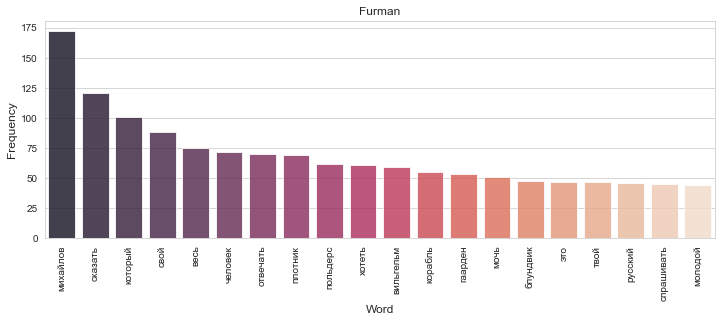

<Figure size 432x288 with 0 Axes>

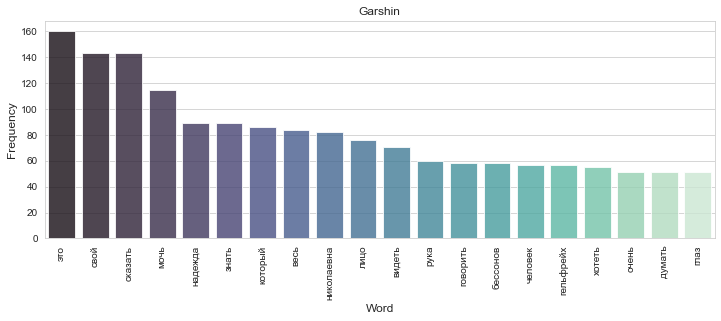

<Figure size 432x288 with 0 Axes>

In [5]:
plot_words_count(dataset.data)

Count and visualize as barplots

d:\study\pyenvnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


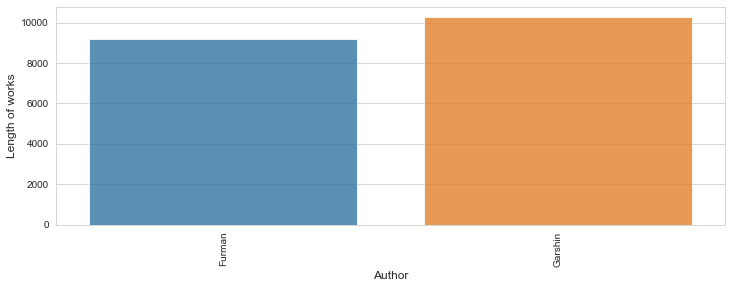

<Figure size 432x288 with 0 Axes>

In [6]:
plot_compare_bars(dataset.data)

In [7]:
dataset.chunking()
dataset.data

,label,author,text
0,0,Furman,"[[фурман, саардамский, плотник, глава, незнако..."
0,1,Garshin,"[[всеволод, михайлович, гаршин, надежда, никол..."


In [8]:
dataset.embedding(ELMo)

ELMo embedding process::   0%|          | 0/2 [00:00<?, ?it/s]2021-11-23 23:05:57,523 : INFO : Loading model from ./elmo/...
2021-11-23 23:05:57,525 : INFO : We will cache the vocabulary of 100 tokens.
d:\study\pyenvnn\lib\site-packages\simple_elmo\model.py:529: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  lstm_cell = tf.compat.v1.nn.rnn_cell.LSTMCell(
d:\study\pyenvnn\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:984: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._kernel = self.add_variable(
d:\study\pyenvnn\lib\site-packages\keras\layers\legacy_rnn\rnn_cell_impl.py:993: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self._bias = self.ad

(485,)

In [9]:
dataset.data

,label,author,text,embeddings
0,0,Furman,"[фурман, саардамский, плотник, глава, незнаком...","[[0.05090406537055969, -0.466616153717041, -0...."
1,0,Furman,"[ровно, набегать, берег, оставлять, каменья, ж...","[[-0.16346460580825806, 0.38957035541534424, 0..."
2,0,Furman,"[берег, начинать, оживляться, остроконечный, к...","[[-0.2622142434120178, 0.17295807600021362, 0...."
3,0,Furman,"[черный, масса, полуоконченный, смоленый, судн...","[[0.3025384545326233, -0.36849087476730347, -0..."
4,0,Furman,"[узкий, деревянный, лестница, выбеливать, мука...","[[0.7458748817443848, 0.10879498720169067, 0.8..."
...,...,...,...,...
251,1,Garshin,"[белый, лежать, пол, мочь, доставать, очень, э...","[[-0.3222544193267822, -0.6970810890197754, -0..."
252,1,Garshin,"[убивать, собирать, сила, приподниматься, увид...","[[0.16983288526535034, -0.4055575728416443, -0..."
253,1,Garshin,"[семен, иванович, бросаться, ко, почувствовать...","[[-0.2409442812204361, 0.0597444623708725, 0.1..."
254,1,Garshin,"[хлынуть, смертельный, рана, голова, кончать, ...","[[-0.22415736317634583, 0.08180497586727142, 0..."


In [10]:
train_set = TrainSet(dataset.data)
train_set.shape

,Train,Test
X,"(412, 40, 1024)","(73, 40, 1024)"
Y,"(412, 3)","(73, 3)"


In [11]:
cnn = CNN(train_set.X_shape())
bilstm = BiLSTM(train_set.X_shape())
cnn_bilstm = Ensemble(train_set)

In [12]:
import tensorflow as tf
tf.compat.v1.experimental.output_all_intermediates(True)
cnn_bilstm.add(cnn)
cnn_bilstm.add(bilstm)
cnn_bilstm.build()
cnn_bilstm.fit()
cnn_bilstm.predict()

Train on 412 samples
Epoch 1/10
412/412 [==============================] - 3s 6ms/sample - loss: 1.2728 - accuracy: 0.6481
Epoch 2/10
412/412 [==============================] - 0s 291us/sample - loss: 0.2649 - accuracy: 0.8932
Epoch 3/10
412/412 [==============================] - 0s 283us/sample - loss: 0.1020 - accuracy: 0.9539
Epoch 4/10
412/41

d:\study\pyenvnn\lib\site-packages\mlxtend\classifier\ensemble_vote.py:166: UserWarning: fit_base_estimators=False enforces use_clones to be `False`
  warnings.warn("fit_base_estimators=False "
d:\study\pyenvnn\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0], dtype=uint8)

In [13]:
from data.TestSet import TestSet
from utils.constants import BOOKS_DIR

path = f"{BOOKS_DIR}/Sholokhov/and-quiet-flows-the-don.txt"
testing = TestSet(path, names, ELMo)

Embeddings loaded successfully


d:\study\pyenvnn\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


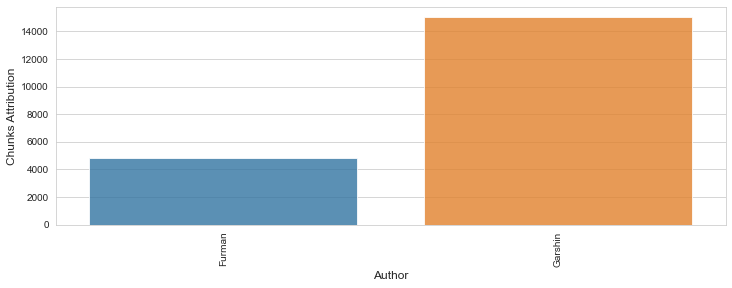

<Figure size 432x288 with 0 Axes>

In [14]:
testing.preds = cnn_bilstm.model.predict(testing.data)
testing.plot_prediction()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
cnts = [len(np.where(testing.preds == i)[0]) for i in range(2)]
fig = plt.figure(figsize=(12, 4))
fig.set_facecolor('white')

sns.barplot(testing.labels, cnts, alpha=0.8)
plt.ylabel('Chunks Attribution', fontsize=12)
plt.xlabel('Author', fontsize=12)
plt.xticks(rotation=90)
plt.show()
plt.savefig(f"./plots/{testing.author}_{testing.work}.png")

In [22]:
import numpy as np
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=testing.data, y=np.array(train_set.Y_train, dtype='uint8'), clf=cnn_bilstm.model)


KeyboardInterrupt: 